## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\nagpa\OneDrive\Desktop\dataset.csv', parse_dates = ['DATE'])
data.head()
#data.DATE.dtype

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


### Working on PRCP column (Target Column)

In [3]:
data.loc[data['PRCP'] > 0, 'PRCP'] = 1

## Data Cleaning and Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1827 non-null   object        
 1   NAME     1827 non-null   object        
 2   DATE     1827 non-null   datetime64[ns]
 3   AWND     1823 non-null   float64       
 4   PGTM     62 non-null     float64       
 5   PRCP     1827 non-null   float64       
 6   TAVG     0 non-null      float64       
 7   TMAX     1827 non-null   int64         
 8   TMIN     1827 non-null   int64         
 9   WDF2     1822 non-null   float64       
 10  WDF5     1809 non-null   float64       
 11  WSF2     1823 non-null   float64       
 12  WSF5     1809 non-null   float64       
 13  WT01     551 non-null    float64       
 14  WT02     39 non-null     float64       
 15  WT08     861 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 228.5+ KB

In [5]:
data.shape

(1827, 16)

In [6]:
data.describe()

,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.091407,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.288265,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,1.000000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


## Visualizing Class Imbalance

<AxesSubplot:xlabel='PRCP', ylabel='count'>

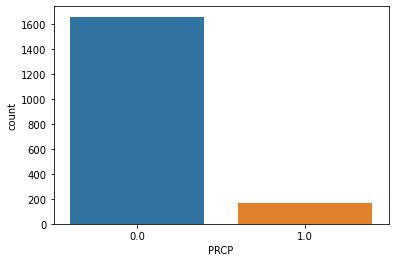

In [7]:
sns.countplot(x = 'PRCP',data = data)

#### Here we can clearly see the number of samples for the case when precipitation occurs is much less than for the case when precipitation does not occur. Hence, there is class imbalance

### Checking for Null Values

<AxesSubplot:>

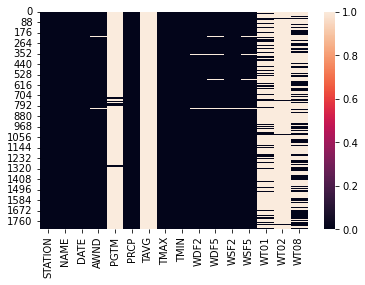

In [8]:
sns.heatmap(data.isnull())

#### Based on the heatmap, columns PGTM,TAVG,WT01,WT02,WT08 have too many null values and shall be dropped. The rest of the cells with null values will be imputed with the mode value 

In [9]:
data = data.drop(['PGTM','TAVG','WT01','WT02','WT08'],axis = 'columns')
data.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1


### Performing some Exploratory Data Analysis on text and datetime features

In [10]:
#data.STATION.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['STATION'],axis='columns')

In [11]:
#data.NAME.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['NAME'],axis='columns')

In [12]:
#data.DATE.nunique()
#Since all values are different, dropping this row for now since this is the basic version of the model.
#Later, in the advanced version, will try to categorize based on d,m,y etc.
data = data.drop(['DATE'],axis = 'columns')

In [13]:
#finding and dropping duplicates
data.duplicated().sum()
data.drop_duplicates(inplace = True)
data.reset_index(drop=True, inplace=True)

In [14]:
#checking for remaining null values before performing simple imputation
data.isnull().any()

AWND     True
PRCP    False
TMAX    False
TMIN    False
WDF2     True
WDF5     True
WSF2     True
WSF5     True
dtype: bool

In [15]:
#imputing the null values with mode
for i in data.columns:
    if data[i].isnull().any():
        data[i].fillna(data[i].mode()[0], inplace=True)

In [16]:
#finally checking to see if all null values have been dealt with
data.isnull().any()

AWND    False
PRCP    False
TMAX    False
TMIN    False
WDF2    False
WDF5    False
WSF2    False
WSF5    False
dtype: bool

<AxesSubplot:>

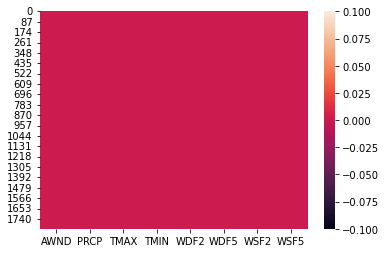

In [17]:
#Showing that all null values have been dealt with
sns.heatmap(data.isnull())

## Feature Selection (Selecting features based on statistical analysis)

### Chi Square Test

In [18]:
from sklearn.feature_selection import chi2
X = data.drop(['PRCP'],axis='columns')
y = data.PRCP
chi_scores = chi2(X,y)
chi_scores

(array([  78.99217899,  318.97057904,   53.99434374, 2307.72024401,
        1826.18067938,   32.22783028,   83.7298769 ]),
 array([6.23563041e-19, 2.42735069e-71, 2.01067594e-13, 0.00000000e+00,
        0.00000000e+00, 1.37112662e-08, 5.67214961e-20]))

<AxesSubplot:>

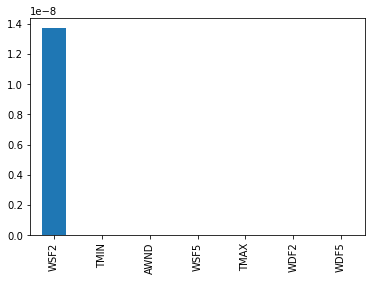

In [19]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Since WSF2 has high p-value, it says that this variables is independent of the repsone and can not be considered for model training

In [20]:
data = X.drop(['WSF2'],axis = 'columns')
data.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF5
0,2.46,64,43,10.0,30.0,11.0
1,2.01,65,47,270.0,30.0,8.9
2,0.67,62,44,150.0,150.0,14.1
3,1.34,69,55,270.0,280.0,14.1
4,2.46,59,49,140.0,140.0,16.1


In [21]:
#pip install imblearn

## Normalization (Setting a scale for all the features in the dataset)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(data,y,train_size = 0.8,stratify = y)
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_w_train = scaler.fit_transform(X_train)
X_train_x = pd.DataFrame(X_w_train,columns = X_train.columns)
X_w_test = scaler.transform(X_test)
X_test_x = pd.DataFrame(X_w_test,columns = X_test.columns)

In [23]:
# defining a function to evaluate my models based on certain metrics(all proposed ones except roc_auc which has been done separately)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Implementing Different Models

### Logistic Regression

Best params: {'C': 24.420530945486497, 'penalty': 'l2'}
ROC_AUC score is : 0.9273457466228551
Test Result:
Accuracy Score: 85.21%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.982639   0.363636  0.852055    0.673138      0.926674
recall       0.852410   0.848485  0.852055    0.850447      0.852055
f1-score     0.912903   0.509091  0.852055    0.710997      0.876394
support    332.000000  33.000000  0.852055  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[283  49]
 [  5  28]]



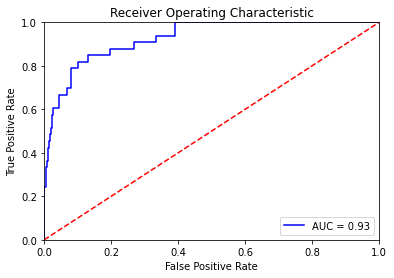

<AxesSubplot:>

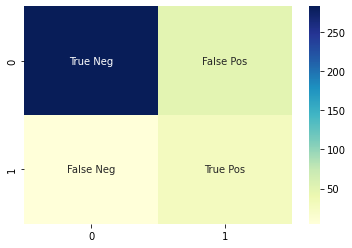

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : np.logspace(-4, 4, 50),'penalty' :['l2']} 

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring = 'roc_auc')
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

lr = LogisticRegression(**best_params)
lr.fit(X_train_x,y_train)
y_preds = lr.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(lr, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_x)),annot = labels,fmt='',cmap = "YlGnBu")

### Support Vector Classifier

Best params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
ROC_AUC score is : 0.9302665206279663
Test Result:
Accuracy Score: 86.30%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.973154   0.373134  0.863014    0.673144      0.918906
recall       0.873494   0.757576  0.863014    0.815535      0.863014
f1-score     0.920635   0.500000  0.863014    0.710317      0.882605
support    332.000000  33.000000  0.863014  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[290  42]
 [  8  25]]



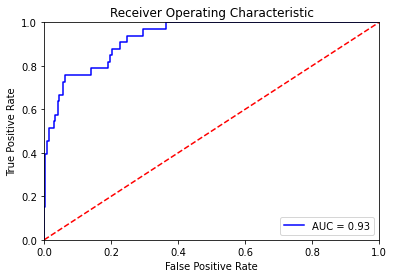

<AxesSubplot:>

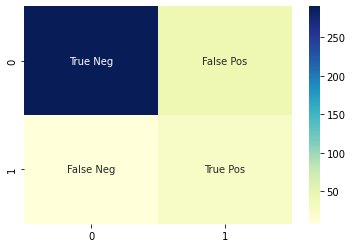

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm = SVC(**best_params,probability = True)
svm.fit(X_train_x, y_train)
y_preds = svm.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(svm, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Decision Tree Classifier

ROC_AUC score is : 0.7806224899598393
Test Result:
Accuracy Score: 87.40%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.964286   0.385965  0.873973    0.675125      0.911999
recall       0.894578   0.666667  0.873973    0.780622      0.873973
f1-score     0.928125   0.488889  0.873973    0.708507      0.888413
support    332.000000  33.000000  0.873973  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[297  35]
 [ 11  22]]



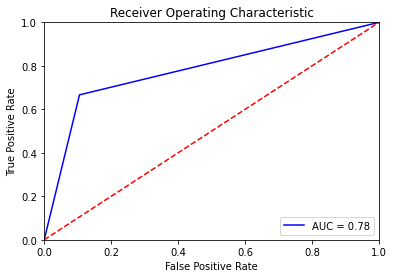

<AxesSubplot:>

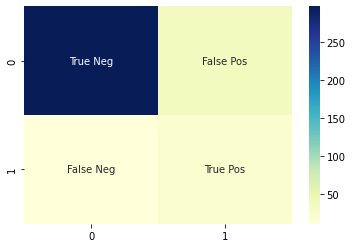

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

dt = DecisionTreeClassifier()
dt.fit(X_train_x, y_train)
y_preds = dt.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(dt, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gaussian Naive Bayes

ROC_AUC score is : 0.8963125228185469
Test Result:
Accuracy Score: 85.48%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.963455   0.343750  0.854795    0.653603      0.907427
recall       0.873494   0.666667  0.854795    0.770080      0.854795
f1-score     0.916272   0.453608  0.854795    0.684940      0.874442
support    332.000000  33.000000  0.854795  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[290  42]
 [ 11  22]]



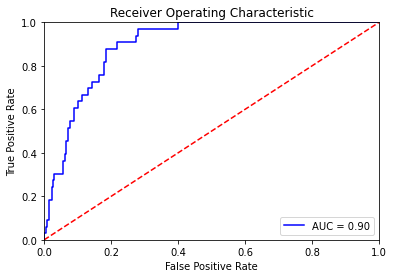

<AxesSubplot:>

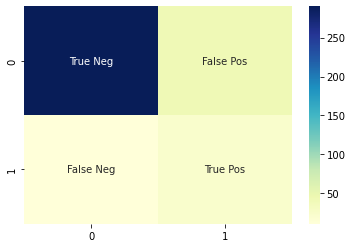

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
# param_grid = {} 

# grid = GridSearchCV(GaussianNB(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gnb = GaussianNB()
gnb.fit(X_train_x, y_train)
y_preds = gnb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gnb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gradient Boosting Classifier

ROC_AUC score is : 0.9347389558232932
Test Result:
Accuracy Score: 91.23%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.980769   0.509434  0.912329    0.745102      0.938155
recall       0.921687   0.818182  0.912329    0.869934      0.912329
f1-score     0.950311   0.627907  0.912329    0.789109      0.921162
support    332.000000  33.000000  0.912329  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[306  26]
 [  6  27]]



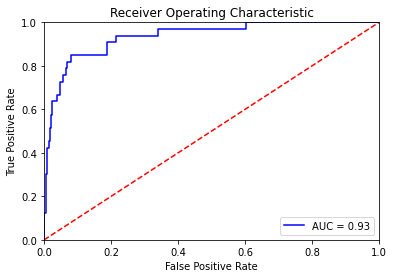

<AxesSubplot:>

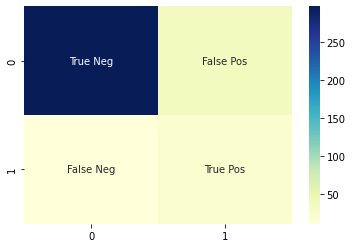

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# param_grid = {} 

# grid = GridSearchCV(GradientBoostingClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gb = GradientBoostingClassifier()
gb.fit(X_train_x, y_train)
y_preds = gb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Random Forest Classifier

ROC_AUC score is : 0.9148411829134722
Test Result:
Accuracy Score: 91.51%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.965944   0.523810  0.915068    0.744877      0.925970
recall       0.939759   0.666667  0.915068    0.803213      0.915068
f1-score     0.952672   0.586667  0.915068    0.769669      0.919581
support    332.000000  33.000000  0.915068  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[312  20]
 [ 11  22]]



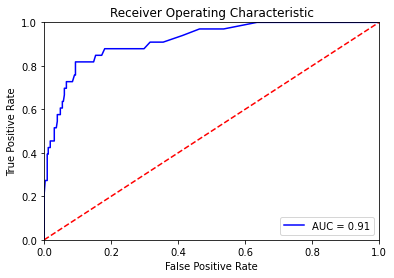

<AxesSubplot:>

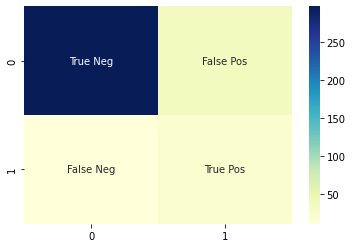

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

rf = RandomForestClassifier()
rf.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(rf, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### XGB Classifier

ROC_AUC score is : 0.9148411829134722
Test Result:
Accuracy Score: 93.97%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.969697   0.657143  0.939726    0.813420      0.941439
recall       0.963855   0.696970  0.939726    0.830413      0.939726
f1-score     0.966767   0.676471  0.939726    0.821619      0.940521
support    332.000000  33.000000  0.939726  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[320  12]
 [ 10  23]]



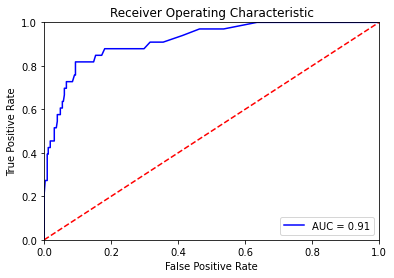

<AxesSubplot:>

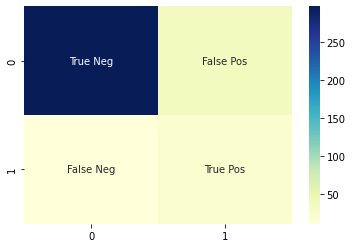

In [30]:
from xgboost import XGBClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'error')
xgb.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(xgb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Cat Boost Classifier

ROC_AUC score is : 0.9148411829134722
Test Result:
Accuracy Score: 93.97%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.978395   0.634146  0.939726    0.806271      0.947271
recall       0.954819   0.787879  0.939726    0.871349      0.939726
f1-score     0.966463   0.702703  0.939726    0.834583      0.942617
support    332.000000  33.000000  0.939726  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[317  15]
 [  7  26]]



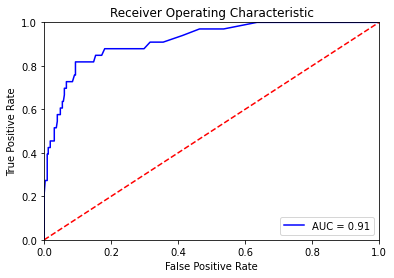

<AxesSubplot:>

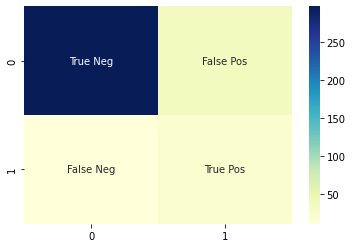

In [31]:
from catboost import CatBoostClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(cat, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

#### Applied Hyperparameter training for all models but it did not result in any significant improvement in most cases.

## Model Comparision

In [32]:
MLA = [lr,dt,gnb,svm,gb,rf,xgb,cat]

In [55]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
index = 0
for alg in MLA:
    predicted = alg.fit(X_train_x, y_train).predict(X_test_x)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[index,'MLA Name'] = MLA_name
    MLA_compare.loc[index, 'MLA Train Accuracy'] = round(alg.score(X_train_x, y_train), 4)
    MLA_compare.loc[index, 'MLA Test Accuracy'] = round(alg.score(X_test_x, y_test), 4)
    MLA_compare.loc[index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[index, 'MLA AUC'] = metrics.auc(fp, tp)
    index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
6,XGBClassifier,0.9996,0.9397,0.657143,0.696970,0.830413
7,CatBoostClassifier,0.9853,0.9397,0.634146,0.787879,0.871349
5,RandomForestClassifier,1.0000,0.9178,0.534884,0.696970,0.818364
4,GradientBoostingClassifier,0.9577,0.9123,0.509434,0.818182,0.869934
1,DecisionTreeClassifier,1.0000,0.8740,0.381818,0.636364,0.766977
3,SVC,0.9177,0.8630,0.373134,0.757576,0.815535
2,GaussianNB,0.8032,0.8548,0.343750,0.666667,0.770080
0,LogisticRegression,0.8856,0.8521,0.363636,0.848485,0.850447


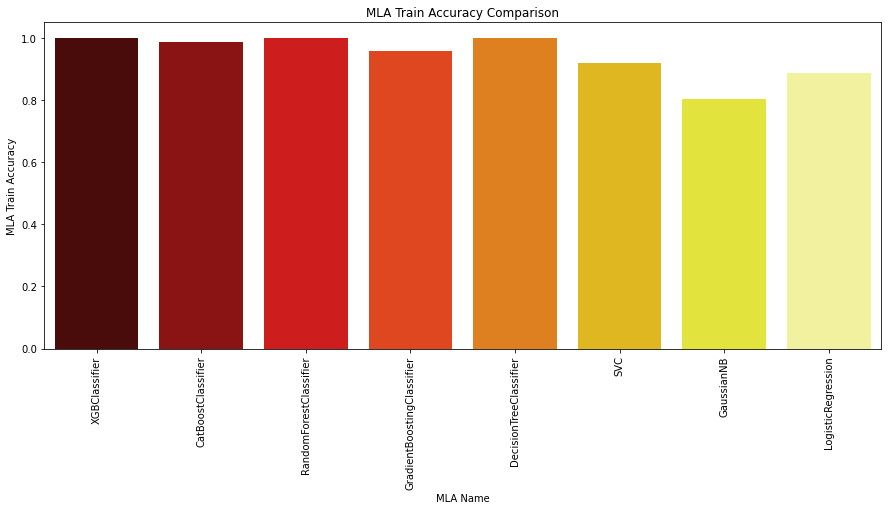

In [54]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot')
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

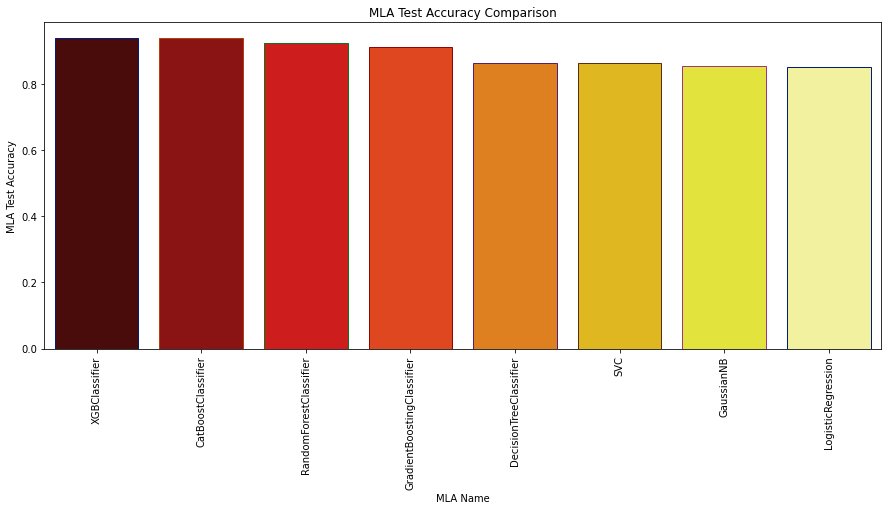

In [41]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

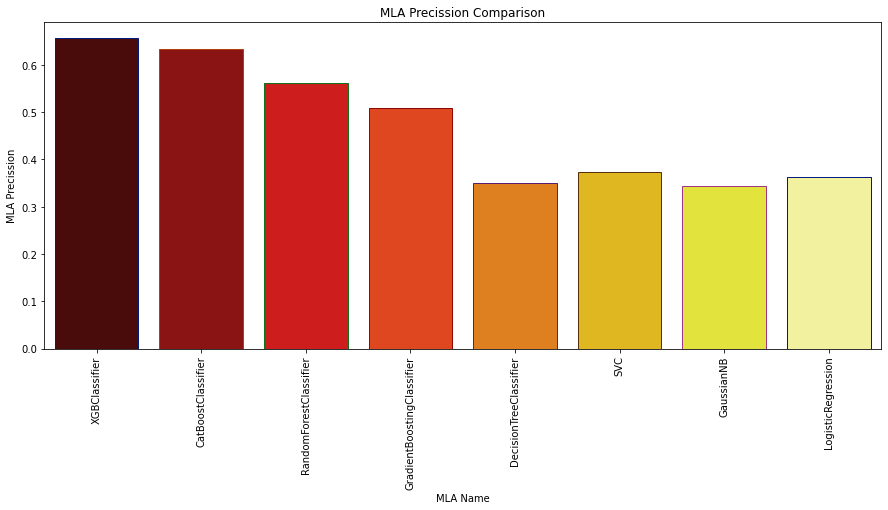

In [42]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

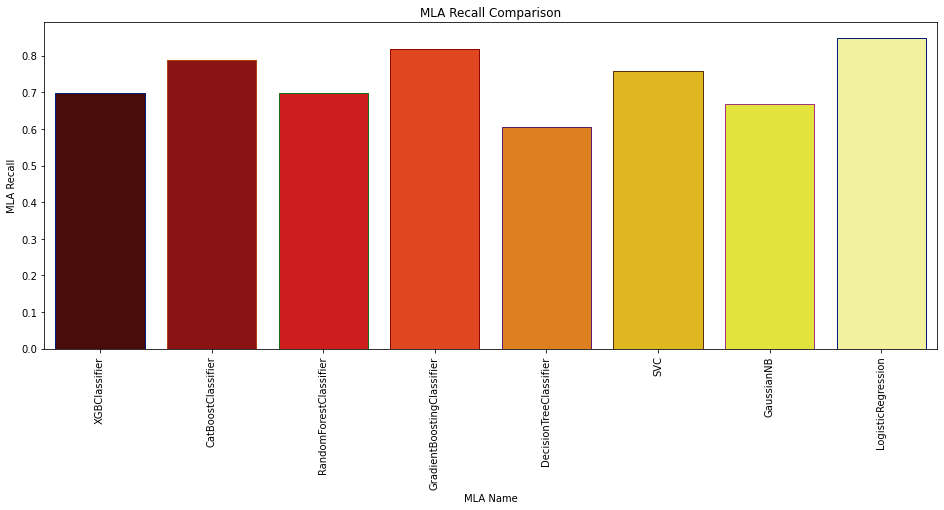

In [50]:
plt.subplots(figsize=(16,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

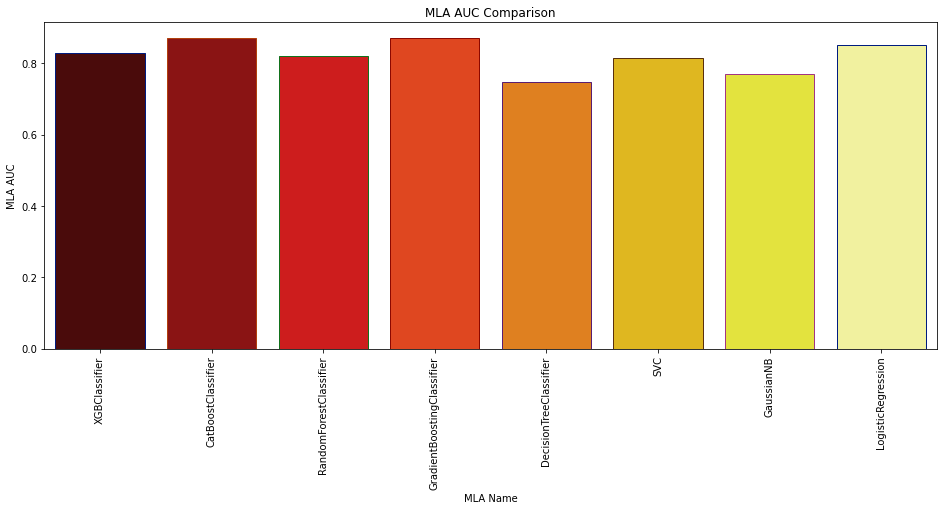

In [51]:
plt.subplots(figsize=(16,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('MLA AUC Comparison')
plt.show()

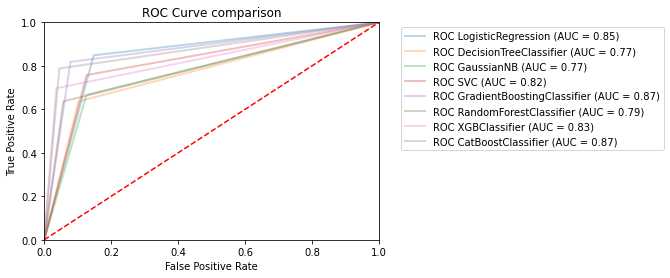

In [53]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train_x, y_train).predict(X_test_x)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    roc_auc_mla = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()